# **Clustering Task: Star Type Clustering**
- 61070278
- 61070306
- 61070365



In [38]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn import preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
from sklearn.cluster import MiniBatchKMeans
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer

# **Load Data**
ทำการโหลดข้อมูลจากไฟล์ Stars_data.csv ที่อยู่ใน github และเก็บไว้ใน dataframe ชื่อว่า df

https://github.com/dsmlr/ML-2020-Dataset/blob/master/Stars%20Clustering/Stars_data.csv

In [39]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/ML/Project/Stars_data.csv')
df

ID  Temperature              L          R    A_M  Color Spectral_Class
0      0         3068       0.002400     0.1700  16.12    Red              M
1      1         3042       0.000500     0.1542  16.60    Red              M
2      2         2600       0.000300     0.1020  18.70    Red              M
3      3         2800       0.000200     0.1600  16.65    Red              M
4      4         1939       0.000138     0.1030  20.06    Red              M
..   ...          ...            ...        ...    ...    ...            ...
195  195        38940  374830.000000  1356.0000  -9.93   Blue              O
196  196        30839  834042.000000  1194.0000 -10.63   Blue              O
197  197         8829  537493.000000  1423.0000 -10.73  White              A
198  198         9235  404940.000000  1112.0000 -11.23  White              A
199  199        37882  294903.000000  1783.0000  -7.80   Blue              O

[200 rows x 7 columns]

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   ID              200 non-null    int64  
 1   Temperature     200 non-null    int64  
 2   L               200 non-null    float64
 3   R               200 non-null    float64
 4   A_M             200 non-null    float64
 5   Color           200 non-null    object 
 6   Spectral_Class  200 non-null    object 
dtypes: float64(3), int64(2), object(2)
memory usage: 11.1+ KB


# **Data Pre-Processing**

**Column Color**

In [41]:
# ดูค่า value ภายในคอลัมน์ color เพื่อดูข้อมูลที่ซ้ำกัน
df.Color.value_counts() #มี 17 ลาเบล

Red                   103
Blue-white             26
Blue                   25
Blue White             10
yellow-white            8
White                   7
Blue white              4
white                   3
Yellowish White         3
yellowish               2
Orange                  2
Whitish                 2
White-Yellow            1
Yellowish               1
Orange-Red              1
Blue-White              1
Pale yellow orange      1
Name: Color, dtype: int64

เว็บไซต์สำหรับศึกษาข้อมูลสีของสเปคตรัม 

https://en.wikipedia.org/wiki/Stellar_classification?fbclid=IwAR1cg5FYJUn7mRTvuY9Ms8yfYCgpWGJiRcgDq-5butcEXlxS-zGoKHd_lAI

In [42]:
# สร้าง list เพื่อรวมข้อมูล value ที่มีความหมายเหมือนกันไว้ด้วยกัน 
Blue = ['Blue']
Bluewhite = ['Blue White', 'Blue white', 'Blue-white', 'Blue-White', 'Blue-white']
White = ['Whitish','white','White']
Yellowwhite = ['yellow-white', 'White-Yellow','Yellowish White']
Yellow = ['yellowish', 'Yellowish','Yellow']
Orange = ['Orange']
Orangered = ['Orange-Red']
Paleyelloworange = ['Pale yellow orange']
Red = ['Red']

In [43]:
# replace ข้อมูลภายใน list ที่สร้างไว้ ถูกแทนที่เปลี่ยนเป็น value ใหม่ที่มีความหมายเดียวกัน
df.Color = df.Color.replace(Blue, 'Blue')
df.Color = df.Color.replace(Bluewhite, 'Blue-white')
df.Color = df.Color.replace(White, 'White')
df.Color = df.Color.replace(Yellowwhite, 'Yellow-white')
df.Color = df.Color.replace(Yellow, 'Yellow')
df.Color = df.Color.replace(Paleyelloworange, 'Pale-yellow-orange')
df.Color = df.Color.replace(Orange, 'Orange')
df.Color = df.Color.replace(Orangered, 'Orange-Red')
df.Color = df.Color.replace(Red, 'Red')

In [44]:
# เรียกดู value ภายใน Color column จะเห็นได้ว่าไม่มีข้อมูลที่ซ้ำกันแล้ว
df.Color.value_counts() # มี 9 ลาเบล

Red                   103
Blue-white             41
Blue                   25
Yellow-white           12
White                  12
Yellow                  3
Orange                  2
Pale-yellow-orange      1
Orange-Red              1
Name: Color, dtype: int64

In [45]:
# ทำการแปลงข้อมูลจาก string เป็น integer ด้วยคำสั่ง replace 
df.Color = df.Color.replace('Blue', 2)
df.Color = df.Color.replace('Blue-white', 1)
df.Color = df.Color.replace('White', 3)
df.Color = df.Color.replace('Yellow-white', 4)
df.Color = df.Color.replace('Orange-Red', 7)
df.Color = df.Color.replace('Yellow', 5)
df.Color = df.Color.replace('Pale-yellow-orange', 8)
df.Color = df.Color.replace('Orange', 6)
df.Color = df.Color.replace('Red',0)

In [46]:
# ผลลัพธ์จะมี 9 label ที่มี value เป็น integer
df.Color.value_counts() # มี 9 ลาเบล 

0    103
1     41
2     25
4     12
3     12
5      3
6      2
8      1
7      1
Name: Color, dtype: int64

In [47]:
# เรียกดู value ภายในคอลัมน์ Spectral_Class
df.Spectral_Class.value_counts() #มี 7 ลาเบล

M    102
B     44
A     19
F     17
O     11
K      6
G      1
Name: Spectral_Class, dtype: int64

In [48]:
# ทำการแปลงข้อมูลจาก string เป็น integer ด้วยคำสั่ง replace 
df.Spectral_Class = df.Spectral_Class.replace('M', 0)
df.Spectral_Class = df.Spectral_Class.replace('B', 1)
df.Spectral_Class = df.Spectral_Class.replace('A', 2)
df.Spectral_Class = df.Spectral_Class.replace('F', 3)
df.Spectral_Class = df.Spectral_Class.replace('O', 4)
df.Spectral_Class = df.Spectral_Class.replace('K', 5)
df.Spectral_Class = df.Spectral_Class.replace('G', 6)

In [49]:
# ผลลัพธ์จะมี 7 label ที่มี value เป็น integer
df.Spectral_Class.value_counts() #มี 7 ลาเบล

0    102
1     44
2     19
3     17
4     11
5      6
6      1
Name: Spectral_Class, dtype: int64

In [50]:
X = df
X.columns

Index(['ID', 'Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class'], dtype='object')

In [51]:
columns = ['ID', 'Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']

In [52]:
X

ID  Temperature              L          R    A_M  Color  Spectral_Class
0      0         3068       0.002400     0.1700  16.12      0               0
1      1         3042       0.000500     0.1542  16.60      0               0
2      2         2600       0.000300     0.1020  18.70      0               0
3      3         2800       0.000200     0.1600  16.65      0               0
4      4         1939       0.000138     0.1030  20.06      0               0
..   ...          ...            ...        ...    ...    ...             ...
195  195        38940  374830.000000  1356.0000  -9.93      2               4
196  196        30839  834042.000000  1194.0000 -10.63      2               4
197  197         8829  537493.000000  1423.0000 -10.73      3               2
198  198         9235  404940.000000  1112.0000 -11.23      3               2
199  199        37882  294903.000000  1783.0000  -7.80      2               4

[200 rows x 7 columns]

# **Feature Scale data**

https://medium.com/@rahul77349/feature-scaling-why-it-is-required-8a93df1af310

https://medium.com/analytics-vidhya/practical-approach-to-kmeans-clustering-python-and-why-scaling-is-important-44ac0b0fea47

- normalization
- standardscaler
- powertranformer

# **Normalization**

In [53]:
# ฟังก์ชั่นการ normalize 
def norm(X):
  normalized_X = normalize(X)
  return normalized_X

In [54]:
normalized_X = norm(X)

In [55]:
normalized_X[0:3,:].round(4)

array([[0.0e+00, 1.0e+00, 0.0e+00, 1.0e-04, 5.3e-03, 0.0e+00, 0.0e+00],
       [3.0e-04, 1.0e+00, 0.0e+00, 1.0e-04, 5.5e-03, 0.0e+00, 0.0e+00],
       [8.0e-04, 1.0e+00, 0.0e+00, 0.0e+00, 7.2e-03, 0.0e+00, 0.0e+00]])

# **standardscaler**

In [56]:
columns

['ID', 'Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']

In [57]:
# ฟังก์ชั่นการทำ standardscaler ซึ่งจะได้ค่ z score 
def zscaler(X):
  scaler = preprocessing.StandardScaler() 
  z_score = scaler.fit_transform(X[columns]) 
  return z_score

In [58]:
z_X = zscaler(X)

In [59]:
z_X[:5]

array([[-1.7234121 , -0.70664624, -0.44663612, -0.49154772,  0.93669013,
        -0.71114676, -0.74550755],
       [-1.70609137, -0.7094906 , -0.44663614, -0.49157605,  0.98358746,
        -0.71114676, -0.74550755],
       [-1.68877065, -0.75784468, -0.44663614, -0.49166963,  1.18876328,
        -0.71114676, -0.74550755],
       [-1.67144992, -0.73596501, -0.44663614, -0.49156565,  0.9884726 ,
        -0.71114676, -0.74550755],
       [-1.6541292 , -0.83015701, -0.44663614, -0.49166784,  1.32163905,
        -0.71114676, -0.74550755]])

# **Yeo-Johnson Transformation**

In [60]:
# ฟังก์ชั่นการทำ powertransfomer ด้วยวิธีของ yeojohnson 
def ptscaler(X):
  pt = preprocessing.PowerTransformer(method='yeo-johnson', standardize=True)
  pt_X = pt.fit_transform(X[columns])
  return pt_X

In [61]:
pt_X = ptscaler(X)

In [62]:
pt_X[:5]


array([[-2.11288077, -0.98438459, -0.73531165, -0.69433234,  0.97318935,
        -0.9292138 , -0.9365367 ],
       [-2.05817698, -1.00185482, -0.73624618, -0.7103872 ,  1.028492  ,
        -0.9292138 , -0.9365367 ],
       [-2.01113128, -1.34086596, -0.73634468, -0.76580765,  1.27194288,
        -0.9292138 , -0.9365367 ],
       [-1.96845738, -1.17682122, -0.73639394, -0.70445638,  1.03426029,
        -0.9292138 , -0.9365367 ],
       [-1.92876512, -2.0676491 , -0.73642448, -0.76470994,  1.43083042,
        -0.9292138 , -0.9365367 ]])

In [63]:
# ลิสต์ชื่อคอลัมน์เพื่อเปลี่ยนชื่อคอลัมน์ตาม feature scale
norm_cols = [f'norm_{c}' for c in columns]
z_cols = [f'z_{c}' for c in columns]
pt_cols = [f'pt_{c}' for c in columns]

In [64]:
dftotal = pd.concat([X, pd.DataFrame(normalized_X, columns=norm_cols), pd.DataFrame(z_X, columns=z_cols), pd.DataFrame(pt_X, columns=pt_cols)], axis='columns')
dftotal

ID  Temperature              L  ...    pt_A_M  pt_Color  pt_Spectral_Class
0      0         3068       0.002400  ...  0.973189 -0.929214          -0.936537
1      1         3042       0.000500  ...  1.028492 -0.929214          -0.936537
2      2         2600       0.000300  ...  1.271943 -0.929214          -0.936537
3      3         2800       0.000200  ...  1.034260 -0.929214          -0.936537
4      4         1939       0.000138  ...  1.430830 -0.929214          -0.936537
..   ...          ...            ...  ...       ...       ...                ...
195  195        38940  374830.000000  ... -1.532547  1.074796           1.524117
196  196        30839  834042.000000  ... -1.583538  1.074796           1.524117
197  197         8829  537493.000000  ... -1.590801  1.348107           1.072856
198  198         9235  404940.000000  ... -1.627033  1.348107           1.072856
199  199        37882  294903.000000  ... -1.375544  1.074796           1.524117

[200 rows x 28 columns]

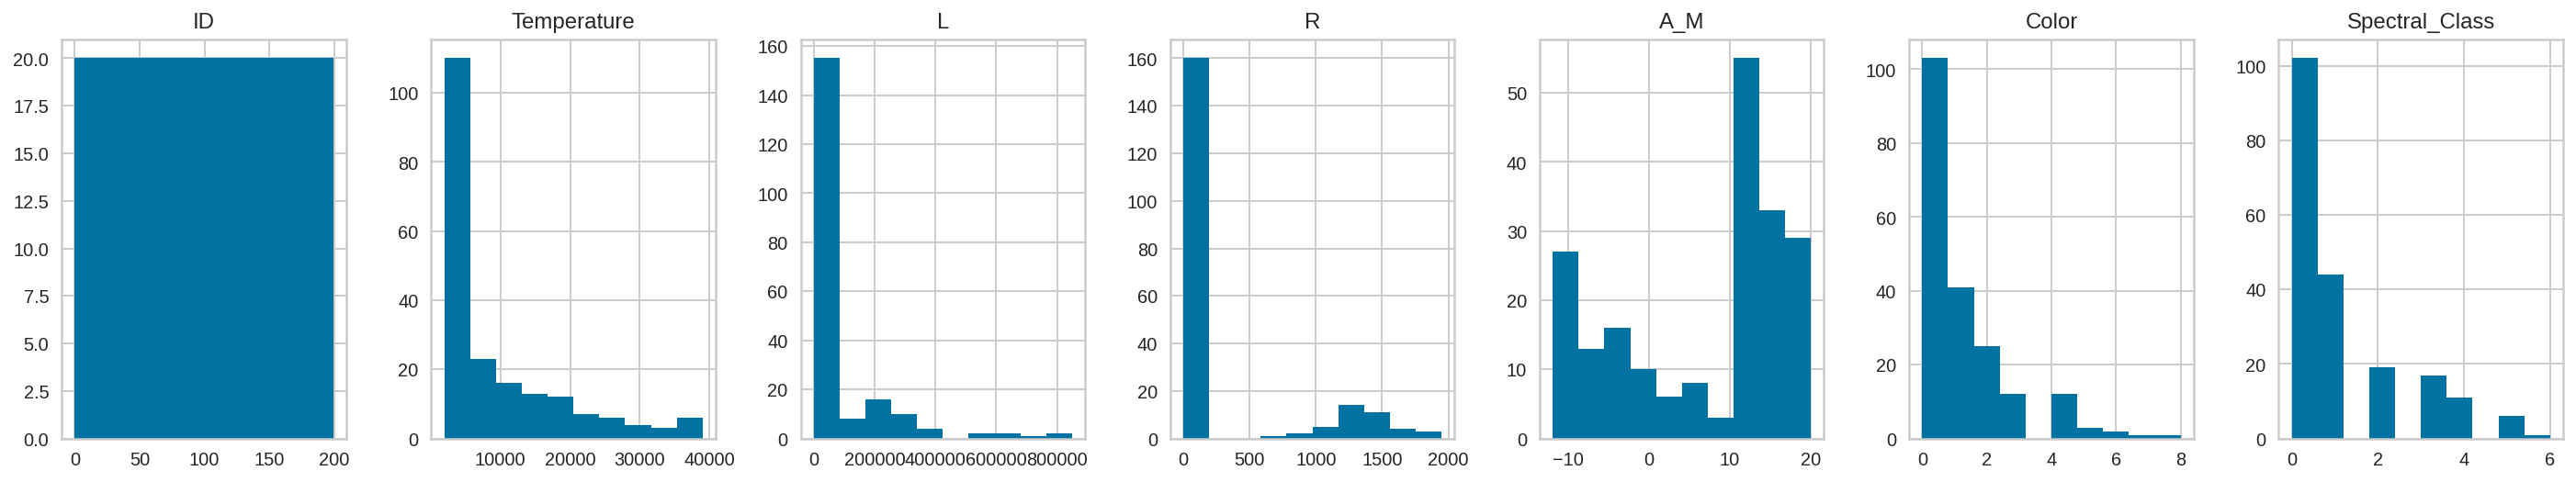

In [65]:
# histogram ของข้อมูล original
dftotal[columns].hist(layout=(1, 8), figsize=(28, 4));

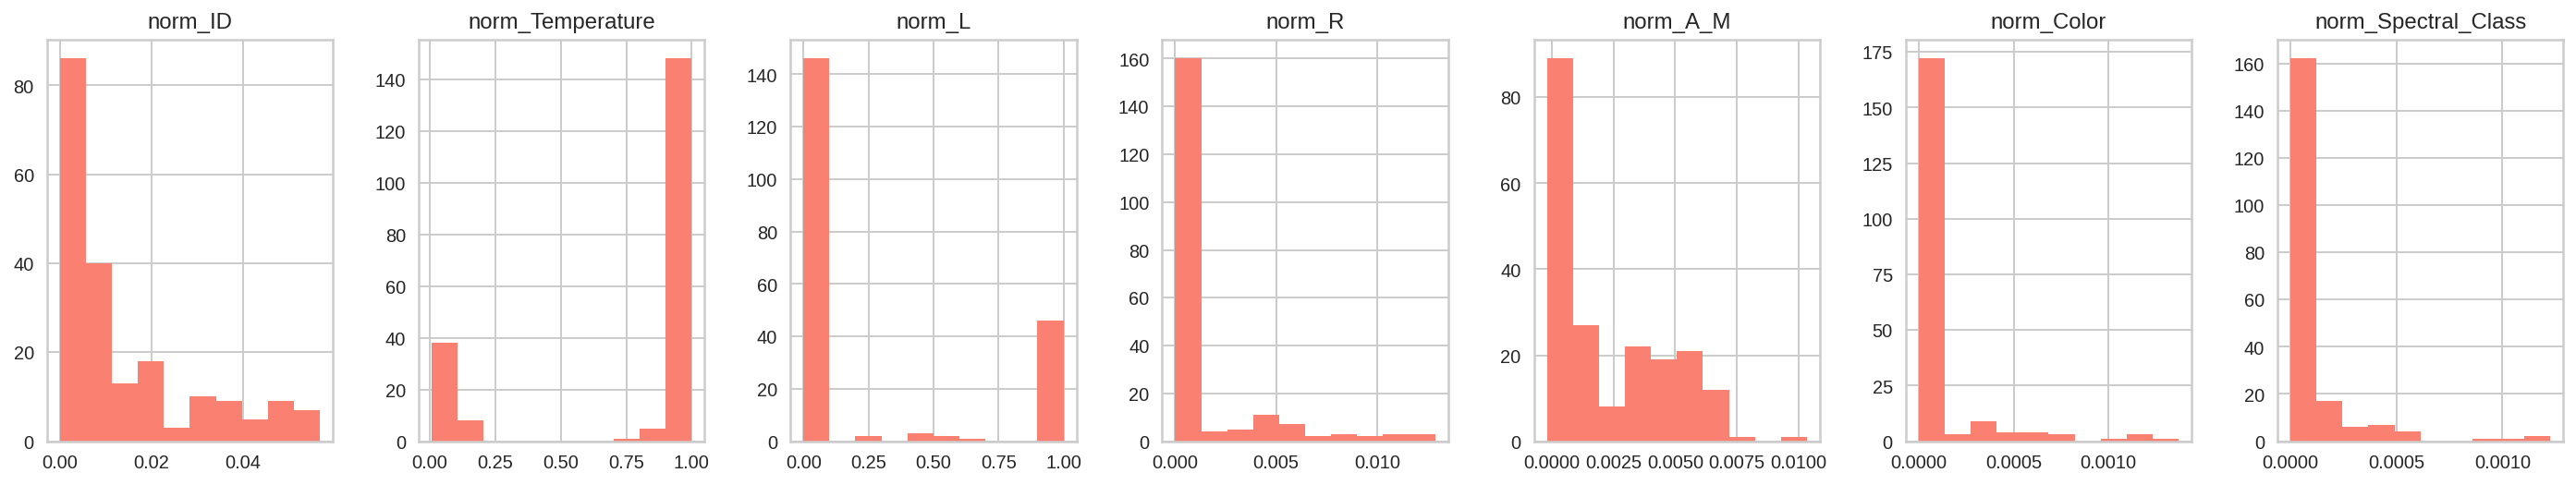

In [66]:
# histogram ของข้อมูลที่ถูก normalize
dftotal[norm_cols].hist(layout=(1, 8), figsize=(28, 4), color='salmon');

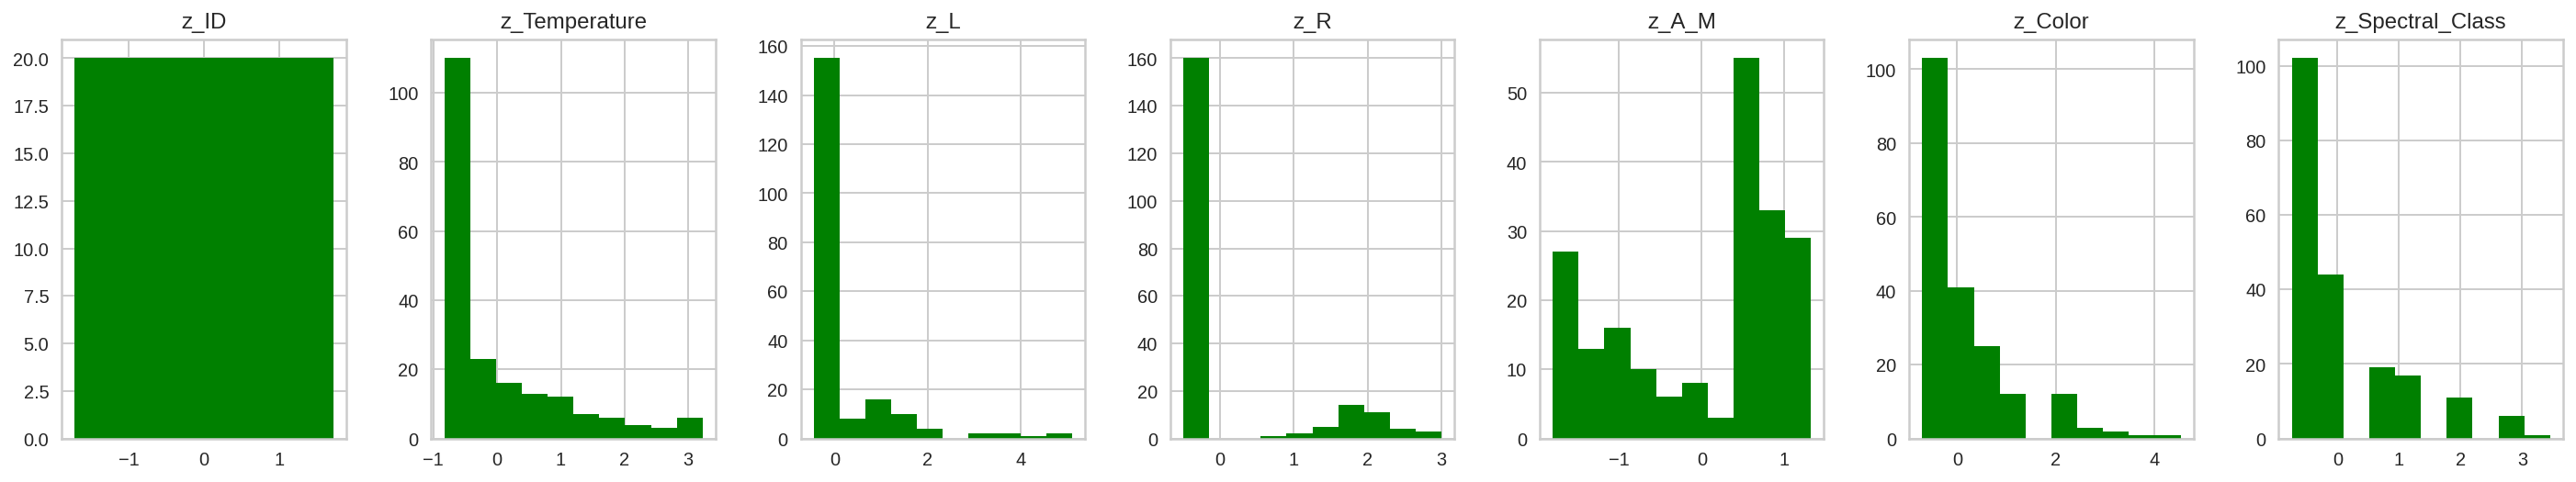

In [67]:
# histogram ของข้อมูลที่ถูก standardscaler
dftotal[z_cols].hist(layout=(1, 8), figsize=(28, 4), color='green');

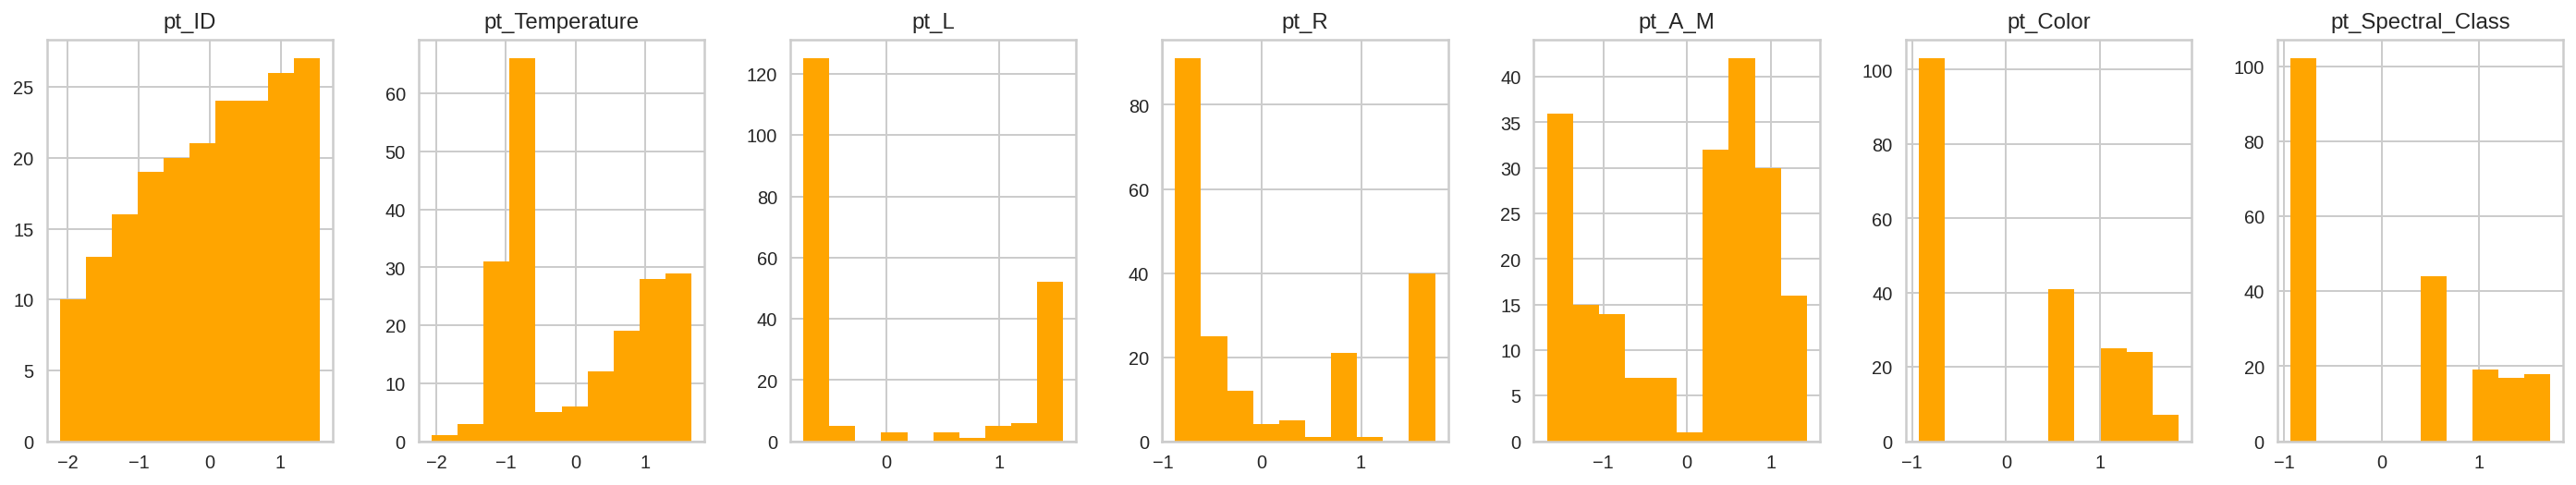

In [68]:
# histogram ของข้อมูลที่ถูก powertranformer
dftotal[pt_cols].hist(layout=(1, 8), figsize=(28, 4), color='orange'); # การใช้ yeo johnson ทำให้รูปทรงของกราฟมีความ normal มากขึ้น เป้นระฆังคว่ำมากขึ้น

In [69]:
# เลือก scale data ด้วยวิธี Powertransformer
pt_X

array([[-2.11288077, -0.98438459, -0.73531165, ...,  0.97318935,
        -0.9292138 , -0.9365367 ],
       [-2.05817698, -1.00185482, -0.73624618, ...,  1.028492  ,
        -0.9292138 , -0.9365367 ],
       [-2.01113128, -1.34086596, -0.73634468, ...,  1.27194288,
        -0.9292138 , -0.9365367 ],
       ...,
       [ 1.52634347,  0.61302637,  1.54798017, ..., -1.59080062,
         1.34810658,  1.07285575],
       [ 1.53976113,  0.66083305,  1.53777099, ..., -1.62703258,
         1.34810658,  1.07285575],
       [ 1.55315951,  1.65514594,  1.52563018, ..., -1.37554428,
         1.07479607,  1.52411729]])

In [70]:
columns

['ID', 'Temperature', 'L', 'R', 'A_M', 'Color', 'Spectral_Class']

In [71]:
X_yeojohnson =pd.DataFrame(pt_X, columns=columns)
X_yeojohnson

ID  Temperature         L  ...       A_M     Color  Spectral_Class
0   -2.112881    -0.984385 -0.735312  ...  0.973189 -0.929214       -0.936537
1   -2.058177    -1.001855 -0.736246  ...  1.028492 -0.929214       -0.936537
2   -2.011131    -1.340866 -0.736345  ...  1.271943 -0.929214       -0.936537
3   -1.968457    -1.176821 -0.736394  ...  1.034260 -0.929214       -0.936537
4   -1.928765    -2.067649 -0.736424  ...  1.430830 -0.929214       -0.936537
..        ...          ...       ...  ...       ...       ...             ...
195  1.499450     1.667307  1.534883  ... -1.532547  1.074796        1.524117
196  1.512906     1.557610  1.562717  ... -1.583538  1.074796        1.524117
197  1.526343     0.613026  1.547980  ... -1.590801  1.348107        1.072856
198  1.539761     0.660833  1.537771  ... -1.627033  1.348107        1.072856
199  1.553160     1.655146  1.525630  ... -1.375544  1.074796        1.524117

[200 rows x 7 columns]

# **Optimal number of cluster**

# **Elbow Method**
แหล่งที่ศึกษาข้อมูล

https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/

https://blog.cambridgespark.com/how-to-determine-the-optimal-number-of-clusters-for-k-means-clustering-14f27070048f

https://medium.com/mlearning-ai/k-means-clustering-with-scikit-learn-e2af706450e4

https://stackabuse.com/change-figure-size-in-matplotlib/ 


https://predictivehacks.com/k-means-elbow-method-code-for-python/

In [72]:
def elbow_plot(start, stop):
  # k-means algorithm พยายามที่จะลดการบิดเบือน(Distortion) ซึ่งเป็นการหา ผลรวมยกกำลังสองของระยะทาง (sum of the squared distances) ระหว่างแต่ละข้อมูลกับจุด centroid 
  sumsquaredist = [] #list สำหรับเก็บค่า K และค่า inertia
  for k in range(start, stop): # วนลูปจำนวน K ที่สนใจ
      model = KMeans(n_clusters=k, init = 'random', max_iter= 300, n_init= 10, random_state= 0) 
      model.fit(X_yeojohnson) # fit model BatchK-Means
      sumsquaredist.append([k ,model.inertia_])
  # for i in sumsquaredist:
  #   print(i)

  df_sumsquaredist =pd.DataFrame(sumsquaredist, columns=['k', 'sumsquare_dist']) # เปลี่ยนจาก list เพื่อเป็น dataframe สำหรับกร plot และดูข้อมูลได้ง่ายขึ้น
  print(df_sumsquaredist)
  print('==============================')
  # plot elbow graph
  plt.figure(figsize = (20,10))
  plt.plot(range(start, stop), df_sumsquaredist['sumsquare_dist'], marker = 'o', linewidth = 1.5, markersize = 4.75 ) 
  plt.xlabel('Number of clusters (K)')
  plt.ylabel('Distortion(sumsquare of distance)');
  return df_sumsquaredist

     k  sumsquare_dist
0    1     1400.000000
1    2      792.924985
2    3      446.961841
3    4      284.052693
4    5      237.599707
..  ..             ...
65  66       10.047792
66  67       10.023732
67  68        9.626657
68  69        9.604955
69  70        9.596636

[70 rows x 2 columns]


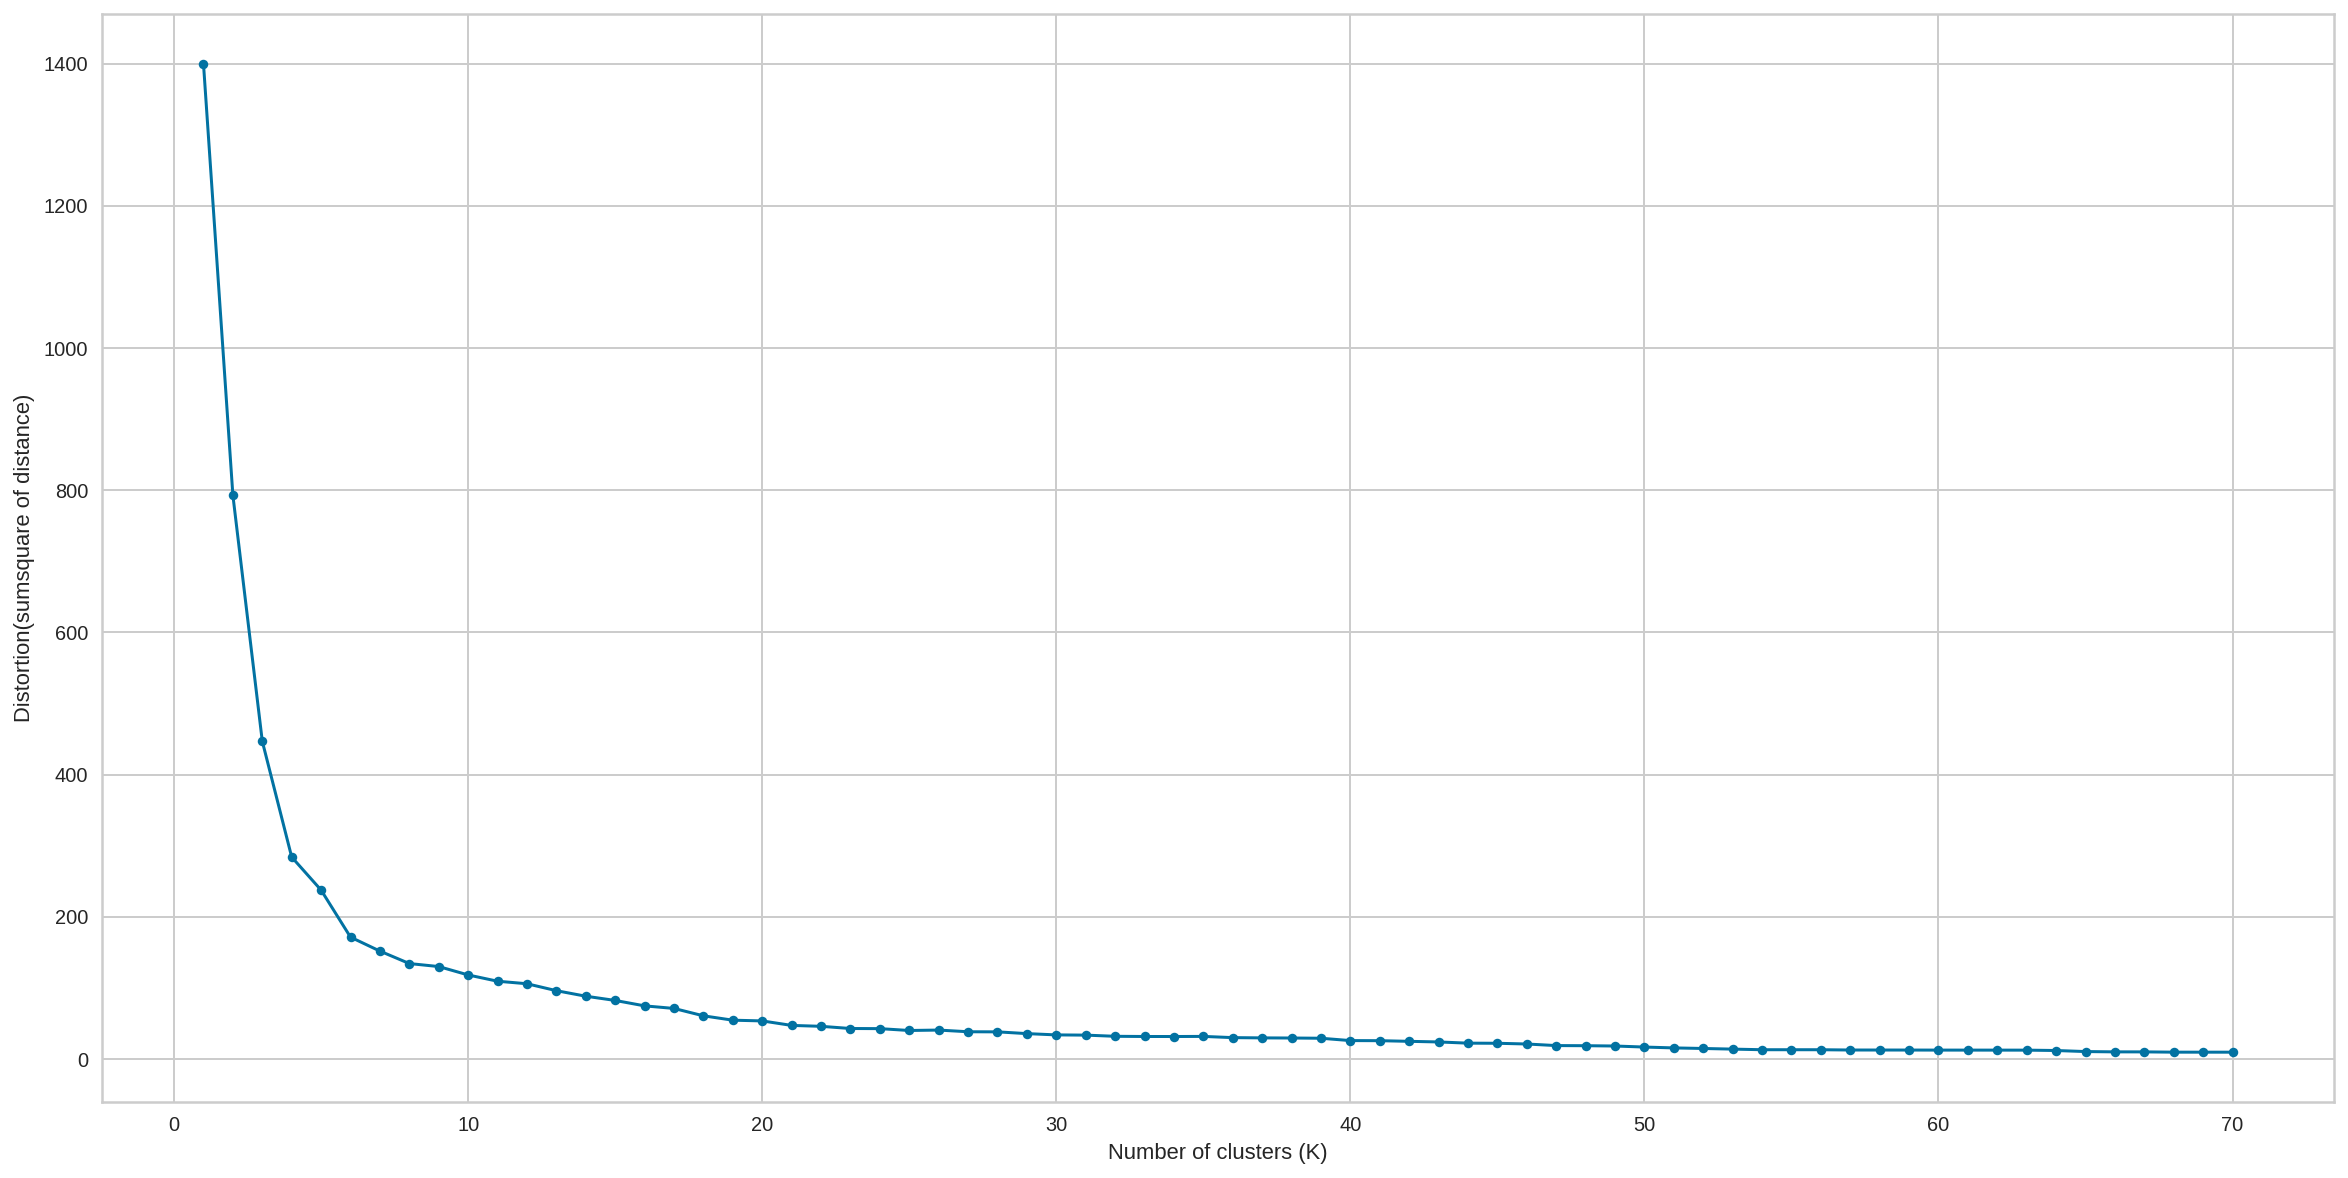

In [73]:
dfelbow = elbow_plot(1, 71)

จากการสังเกตช่วง K = 35 ถึง 70 เส้นกราฟจะเริ่มนิ่งและคงที่จึงเรียกดูข้อมูเพิ่มเติม

In [74]:
dfelbow[35:71]

k  sumsquare_dist
35  36       30.073193
36  37       29.707336
37  38       29.526290
38  39       29.199248
39  40       25.911509
40  41       25.771300
41  42       24.861543
42  43       23.990670
43  44       22.293058
44  45       22.126227
45  46       21.105037
46  47       18.881949
47  48       18.704644
48  49       18.276422
49  50       16.810383
50  51       15.610085
51  52       14.804687
52  53       13.916476
53  54       13.055434
54  55       13.050472
55  56       13.048039
56  57       12.650964
57  58       12.630633
58  59       12.601605
59  60       12.531192
60  61       12.514217
61  62       12.489583
62  63       12.464751
63  64       11.943017
64  65       10.467316
65  66       10.047792
66  67       10.023732
67  68        9.626657
68  69        9.604955
69  70        9.596636

จากผลลัพธ์สนใจค่า K ในช่วง K = 55 ถึง 60 

# **Sillhouette**
แหล่งที่ศึกษาข้อมูล

https://www.kaggle.com/kautumn06/yellowbrick-clustering-evaluation-examples

https://towardsdatascience.com/are-you-solving-ml-clustering-problems-using-k-means-68fb4efa5469

https://blog.floydhub.com/introduction-to-k-means-clustering-in-python-with-scikit-learn/

In [75]:
# function คำนวณค่า Sillhouette Score
def Sill_score(X, start, stop): # start คือ ค่า k ที่เริ่มต้น และ stop คือค่า k ที่ต้องการจะหยุดหาค่า Sillhouette Score
    Sillhouette = [] # list เก็บค่า Sillhouette Score
    for k in range(start, stop + 1):
        model = KMeans(n_clusters=k, init = 'random', max_iter= 300, n_init= 10, random_state= 0)
        model.fit(X) # fit model 
        sill_score = silhouette_score(X, model.labels_) # ใช้ silhouette_score เพื่อคำนวณหา score ของการแบ่งกลุ่มออกเป็นแต่ละ k
        Sillhouette.append([k, sill_score])
        # plot Sillhouette Score graph
        visualizer = SilhouetteVisualizer(model) 
        visualizer.fit(X)
        visualizer.poof() # poof แสดงแผนภาพ
    return Sillhouette

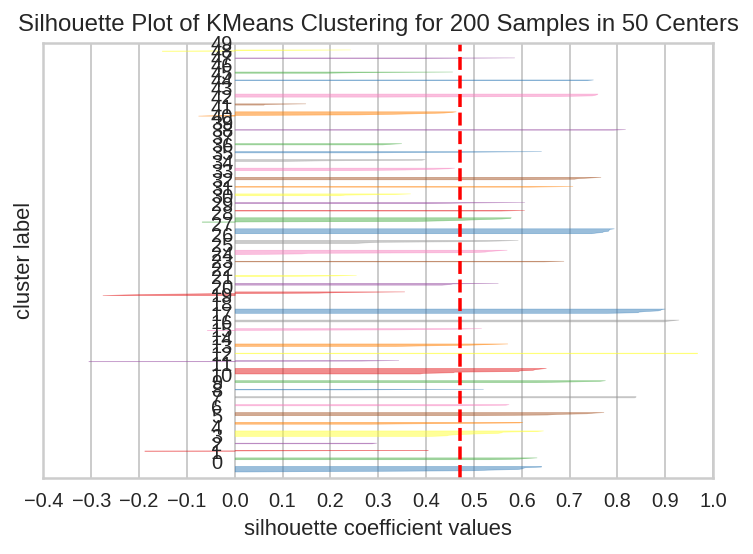

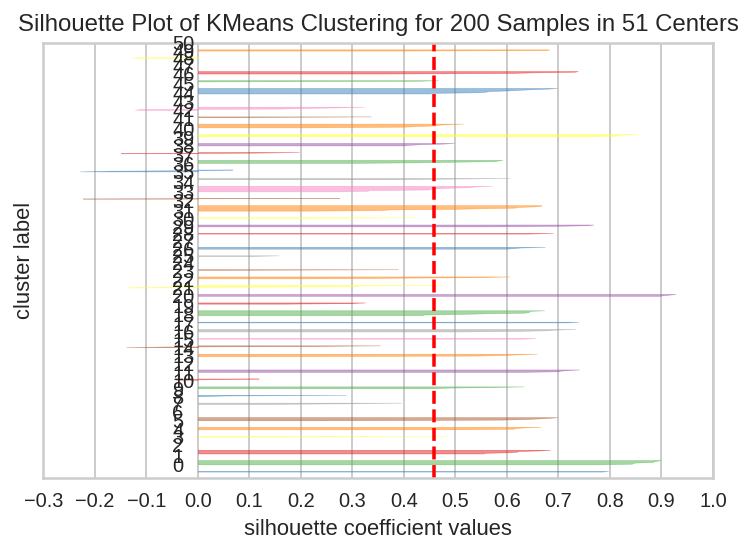

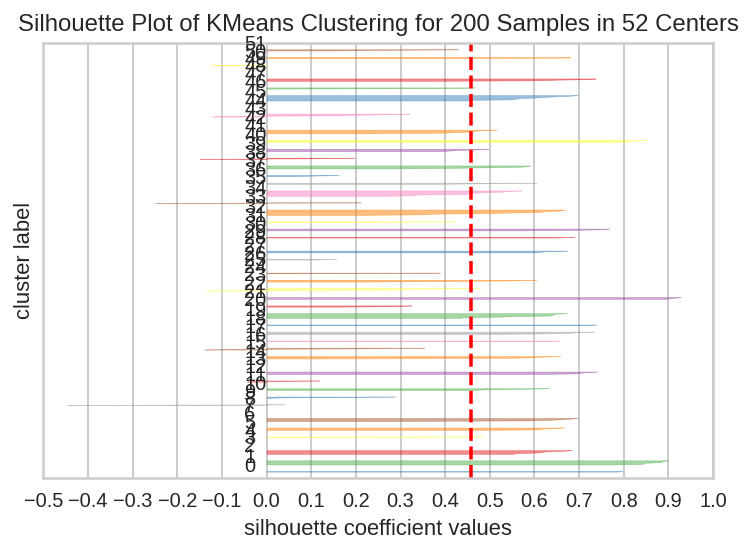

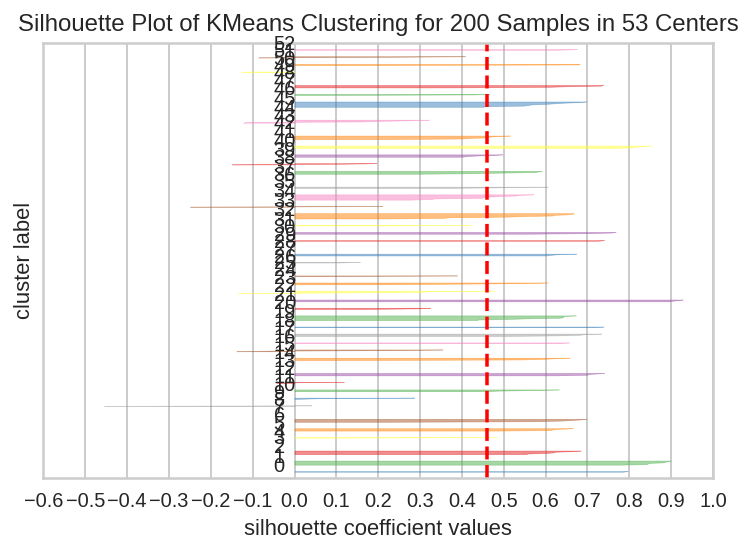

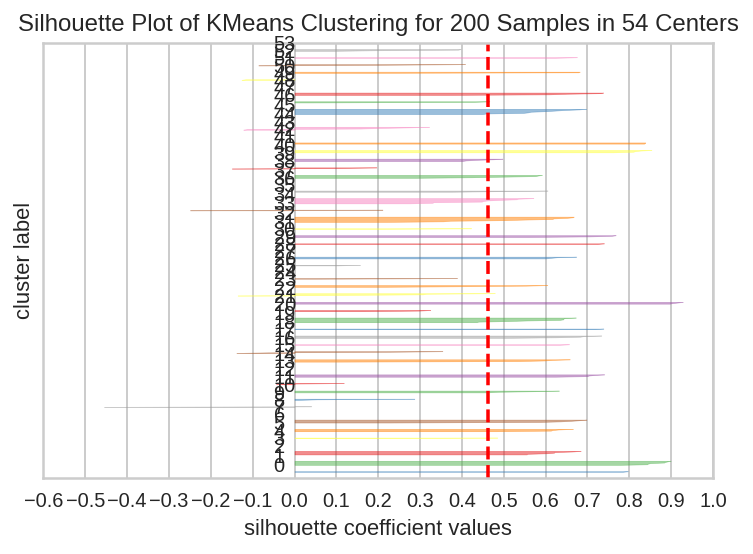

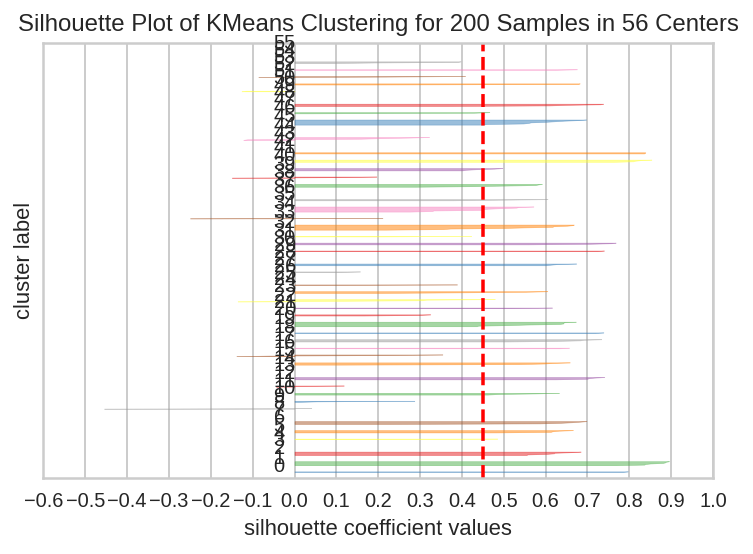

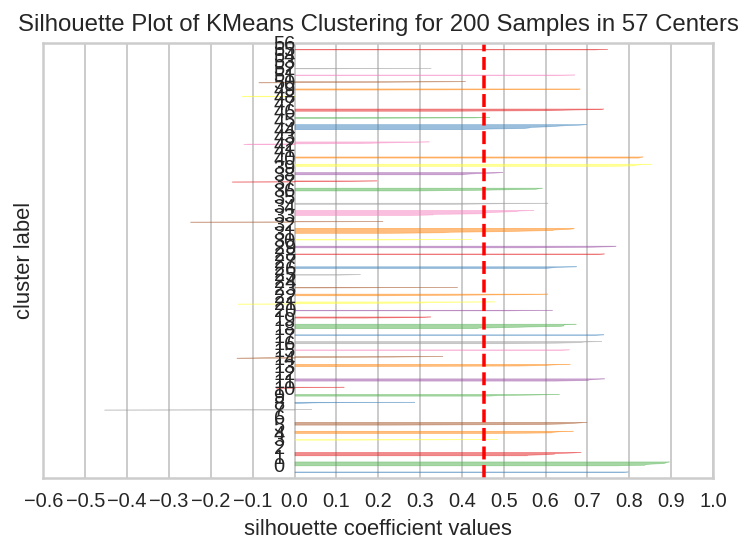

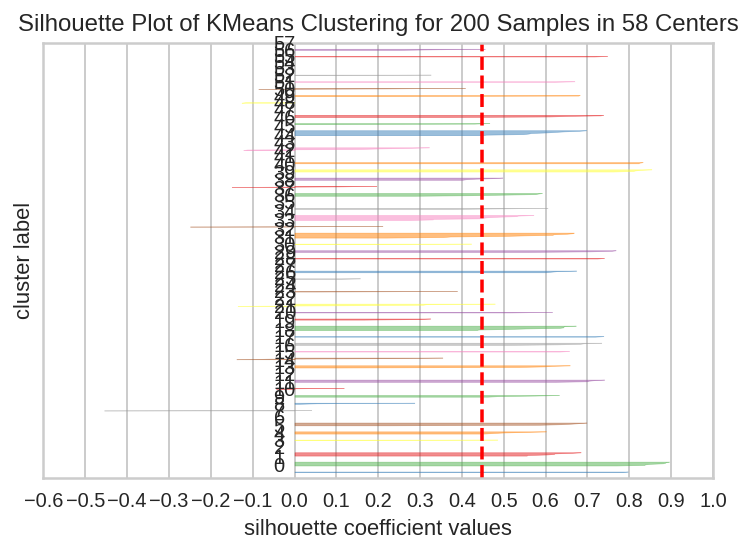

In [76]:
Sill_score = Sill_score(X_yeojohnson, 50, 60)

In [77]:
df_Sillhouette =pd.DataFrame(Sill_score, columns=['k', 'Sillhouette_score'])
df_Sillhouette

k  Sillhouette_score
0   50           0.470517
1   51           0.457960
2   52           0.456979
3   53           0.459971
4   54           0.463119
5   55           0.451856
6   56           0.450379
7   57           0.453969
8   58           0.448239
9   59           0.443572
10  60           0.440828

จากค่า Sillhouette_score จะเห็นว่าค่า K = 57 จะมีค่า score สูงกว่าค่าอื่นในช่วงที่เราสนใจจึงเลือกค่า K มาใช้ในการแบ่งกลุ่ม cluster

# **K-Means Modeling**

In [78]:
X_yeojohnson.head(10)

ID  Temperature         L  ...       A_M     Color  Spectral_Class
0 -2.112881    -0.984385 -0.735312  ...  0.973189 -0.929214       -0.936537
1 -2.058177    -1.001855 -0.736246  ...  1.028492 -0.929214       -0.936537
2 -2.011131    -1.340866 -0.736345  ...  1.271943 -0.929214       -0.936537
3 -1.968457    -1.176821 -0.736394  ...  1.034260 -0.929214       -0.936537
4 -1.928765    -2.067649 -0.736424  ...  1.430830 -0.929214       -0.936537
5 -1.891298    -1.146255 -0.736172  ...  1.072366 -0.929214       -0.936537
6 -1.855585    -1.309015 -0.736133  ...  1.100118 -0.929214       -0.936537
7 -1.821308    -1.340866 -0.736295  ...  1.120953 -0.929214       -0.936537
8 -1.788240    -1.297994 -0.736153  ...  1.126744 -0.929214       -0.936537
9 -1.756209    -1.256403 -0.736404  ...  0.965136 -0.929214       -0.936537

[10 rows x 7 columns]

In [79]:
model=KMeans(n_clusters=57, init = 'random', max_iter= 300, n_init= 10, random_state= 0) 
# parameter ใน Kmeans ใช้ default ของ algorithm แต่จากการทดลองเปลี่ยนค่า init เป็น k-means++ ประสิทธิภาพ purity จะลดลง
model.fit(X_yeojohnson)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
       n_clusters=57, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=0, tol=0.0001, verbose=0)

In [80]:
model.cluster_centers_.round(1)

array([[ 0.7,  1. ,  1.1,  0.7, -0.9,  0.5,  1.1],
       [ 0. , -0.7,  1.5,  1.7, -1.6, -0.9, -0.9],
       [-1.3,  0.6, -0.7, -0.9,  0.7,  1.5,  1.3],
       [-1.9, -2.1, -0.7, -0.8,  1.4, -0.9, -0.9],
       [ 0.7,  1.2,  1.2,  0.7, -1. ,  0.5,  0.5],
       [-0.8, -0.7,  1.5,  1.7, -1.6, -0.9, -0.9],
       [-1.1,  0.2, -0.3, -0.1, -0.4,  1.5,  1.3],
       [-1.5, -0.6, -0.7, -0.4,  0.4, -0.9, -0.9],
       [-0.7,  0.7,  0.6,  0.4, -0.7,  0.9,  0.8],
       [-0. ,  1. , -0.7, -0.9,  0.6,  1.3,  1.4],
       [ 1.2,  1.1, -0.7, -0.9,  0.6,  1.1,  0.5],
       [-0.1,  0.5, -0.7, -0.9,  0.8,  1.4,  1.2],
       [ 0.5,  1. , -0.7, -0.9,  0.5,  0.5,  0.5],
       [-1.5, -0.8, -0.7, -0.5,  0.4, -0.9, -0.9],
       [-0.3,  1.1, -0.7, -0.9,  0.5,  0.7,  0.5],
       [ 1.1, -0.9, -0.7, -0.6,  0.6, -0.9, -0.9],
       [ 1.3,  0.9,  1.1,  0.7, -0.8,  0.5,  1.1],
       [-0.2, -0.2, -0.6, -0.2, -0.2,  1.6,  1.6],
       [ 0.4,  1.3, -0.7, -0.9,  0.5,  1.1,  0.5],
       [-1.9, -1.2, -0.7, -0.7,

In [81]:
model.labels_

array([19, 19, 19, 19,  3, 19, 19, 19, 19, 19, 24, 43, 43, 24, 43, 43, 43,
        7, 43, 13, 46,  2,  2,  2, 46,  2, 46,  2,  2,  2, 51, 51, 51,  8,
        6,  6,  6,  6,  6,  6, 23, 23, 23, 28, 23,  5,  5,  5,  5,  5, 45,
       45, 45, 45, 45, 45, 45, 45, 45, 45, 32, 32, 32, 32, 32, 32, 32, 32,
       32, 32, 11,  9, 11, 14, 14, 49, 14, 14,  9, 14, 17, 17, 17, 17,  8,
       29, 17, 44, 29, 36,  1,  1,  1,  1,  1,  1, 52,  1, 52,  1, 22, 22,
       22, 35, 22, 22, 35, 35, 31, 31, 34, 34, 34, 34, 34, 34, 34, 34, 34,
       34, 12, 18, 18, 12, 12, 49, 12,  9, 11, 12, 27, 42,  0,  4, 27, 27,
       27,  4,  0, 50, 55, 54, 20, 53, 21, 21, 48, 56, 56, 53, 39, 39, 47,
       47, 47, 39, 39, 47, 39, 47, 15, 25, 15, 15, 38, 38, 15, 26, 38, 26,
       10, 10, 10, 10, 37, 37, 37, 37, 37, 37, 30, 16, 16, 30, 50, 50, 33,
       30, 30, 33, 41, 40, 40, 41, 41, 40, 40, 20, 20, 40], dtype=int32)

In [82]:
X_yeojohnson['Label']=model.labels_
X_yeojohnson.head()

ID  Temperature         L  ...     Color  Spectral_Class  Label
0 -2.112881    -0.984385 -0.735312  ... -0.929214       -0.936537     19
1 -2.058177    -1.001855 -0.736246  ... -0.929214       -0.936537     19
2 -2.011131    -1.340866 -0.736345  ... -0.929214       -0.936537     19
3 -1.968457    -1.176821 -0.736394  ... -0.929214       -0.936537     19
4 -1.928765    -2.067649 -0.736424  ... -0.929214       -0.936537      3

[5 rows x 8 columns]

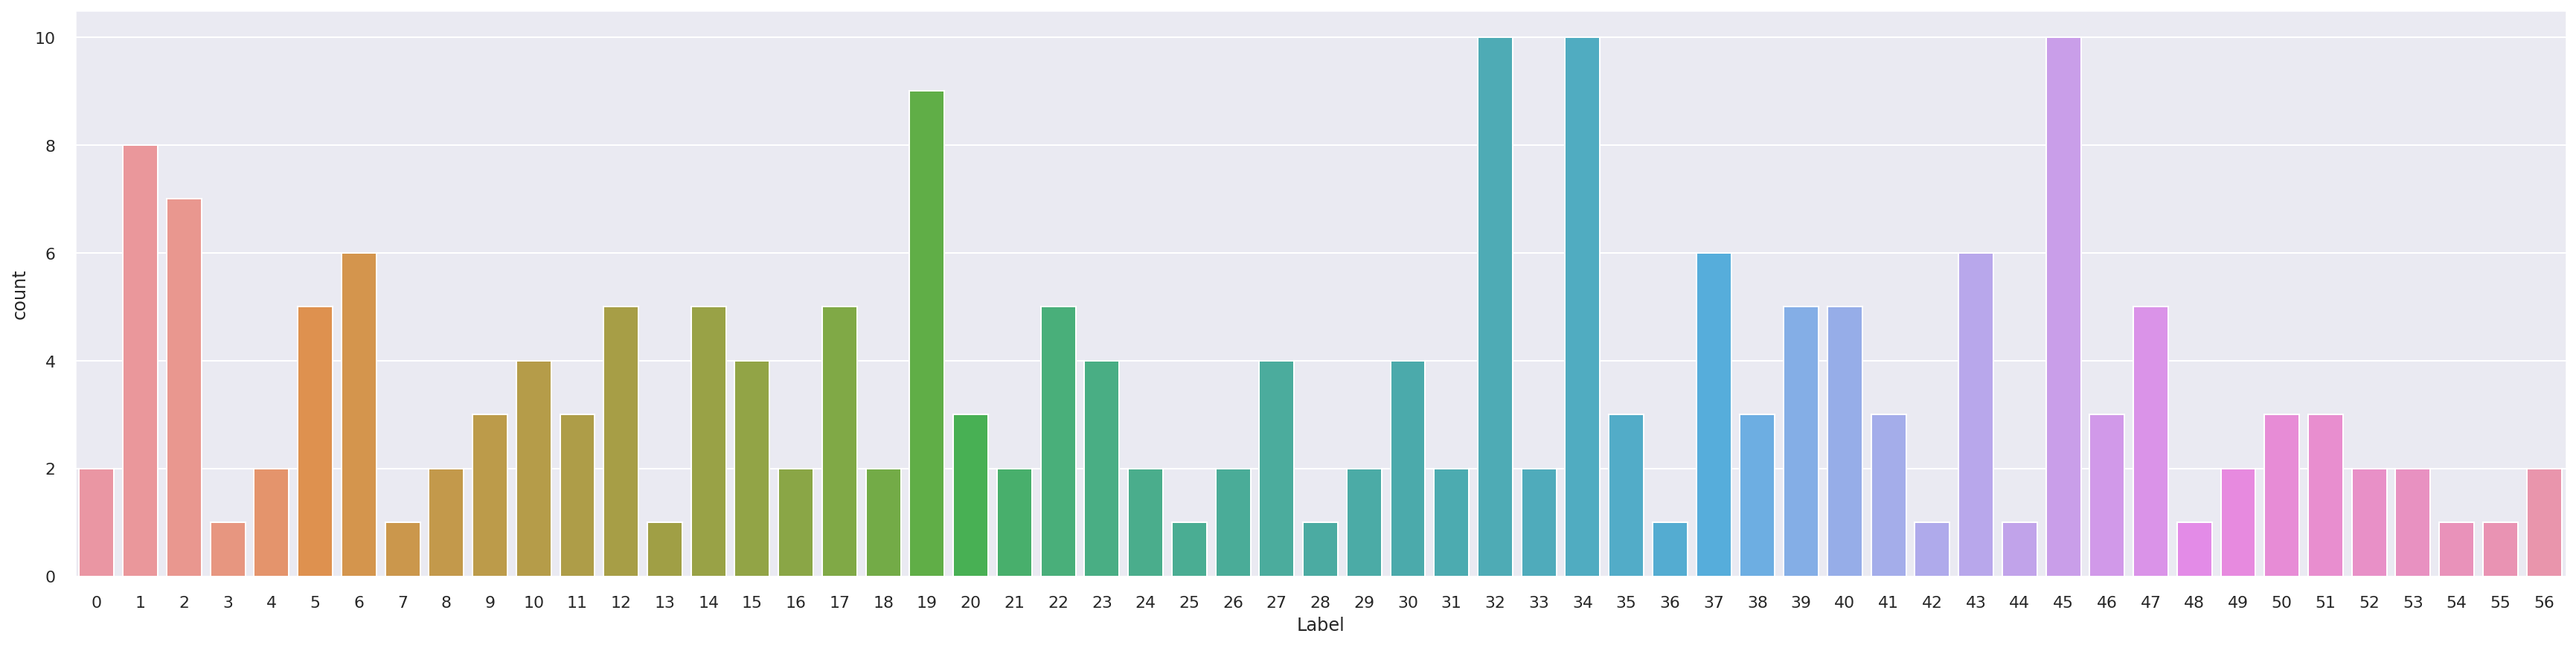

In [83]:
sns.set(rc={'figure.figsize':(30,7)})
sns.countplot(x='Label', data=X_yeojohnson); #https://stackoverflow.com/questions/31594549/how-do-i-change-the-figure-size-for-a-seaborn-plot

In [84]:
listid = X_yeojohnson.index.values.tolist() # สร้าง list column ID
df_list = pd.DataFrame(listid,columns=['ID']) # แปลงจาก list -> dataframe
df = pd.concat([df_list , X_yeojohnson['Label']], axis=1, sort=False) # รวม dataframe เข้าด้วยกัน
df.columns = ['ID','Label']
df

ID  Label
0      0     19
1      1     19
2      2     19
3      3     19
4      4      3
..   ...    ...
195  195     40
196  196     40
197  197     20
198  198     20
199  199     40

[200 rows x 2 columns]

In [85]:
df.to_csv('/content/drive/MyDrive/Colab Notebooks/ML/Project/Clustering_61070278-61070306-61070365Kmeans.csv', index=False)